### Noise Visibility Function (NVF)
${NVF = \frac{1}{1 + \theta \sigma _{x} ^{2} (i, j)}}$
<br>
${\theta = \frac{D}{ \sigma _{x_{max}} ^{2} }}$

### Exercise 5. ex
(a) Read the image lena.png and convert it to grayscale.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 
import numpy as np
imageLena = mpimg.imread("./data/lena.png")
gray__imageLena = cv2.cvtColor(
    imageLena, 
    cv2.COLOR_RGB2GRAY
    
)
plt.imshow(gray__imageLena,  cmap='gray' )
(h, w) = gray__imageLena.shape[:2] 




(b) Add a watermark to the image with and without applying NVF function the different
values of ${σ ^z _2}$ (10, 25, 50, 75) and D. 
<br>
Choose the window size appropriate to used image.

<br>

What can you say about the impact of NVF function?

#### Solution 
I am confused if the watermarking means to put an image on top of the other with transparency,  or to hide data in the other image.
TODO https://www.pyimagesearch.com/2016/04/25/watermarking-images-with-opencv-and-python/

Fistly after defining the noise visibillity function, 
I create a grayscale watermark image.
Then I add a another dimension for the alpha transparency parameter.

In [ ]:
def theta(D, maxLocalVar):
    return 

def NVF(i, j, theta, variance_matrix):
    return 1/(1+ theta* variance_matrix[i][j])

def embeddingEquation(i,j, NVF, x, z):
    return x[i][j] + (1-NVF) * z[i][j]

watermark = cv2.imread("./data/watermark.png", cv2.IMREAD_UNCHANGED)
gray__watermark  = cv2.cvtColor(
    watermark, 
    cv2.COLOR_RGB2GRAY
)
(wH, wW) = gray__watermark.shape[:2]
gray__watermark = gray__watermark.astype("float32")


In [ ]:
arr = np.ones((wH, wW)) * 255
gray_tansp = np.dstack([gray__watermark, arr ])
gray_tansp

In [ ]:
output = gray__imageLena.copy()
h, w = output.shape[:2]
plt.imshow(gray__watermark,  cmap='gray')
overlay = np.zeros((h, w), dtype="uint8")
overlay[h - wH:h, w - wW:w] = gray__watermark
overlay = overlay.astype("float32")
# overlay, output
plt.imshow(overlay,  cmap='gray')
plt.show()
plt.imshow(output,  cmap='gray')
plt.show()
print(output) 
# cv2.addWeighted(overlay, 0.25, output, 1.0, 0, output)
print(output) 
plt.imshow(output,  cmap='gray')
plt.show()
# gray__watermark.shape, output.shape


(c) Report the dependency between the parameters ${σ ^z _2}$ , D and original image.




Exercise 6. ex
(a) You are given a set of images hdr images. Combine the images (not necessary all) to one
image in such a way that the result image has higher quality then all given images in the
set. You can sum, subtract the images, divide by some constant, multiply by some mask,
etc.

(b) Visualise the results and explain how did you obtain them.

Solution for a, b
Base on this example:
TODO https://docs.opencv.org/4.1.0/d2/df0/tutorial_py_hdr.html

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

img_fn= ["./data/hdr_images/"+f for f in ["img01.tif", "img02.tif", "img03.tif", "img04.tif", "img05.tif"]]
img_list = [cv2.imread(fn, -1) for fn in img_fn]
exposure_times = np.array([0.0333, 0.25, 1.0, 2.5, 15.0], dtype=np.float32)

#Merge exposures into HDR image
merge_debevec = cv2.createMergeDebevec()
hdr_debevec = merge_debevec.process(img_list, times=exposure_times.copy())
merge_robertson = cv2.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy())

# Tonemap HDR image
tonemap1 = cv2.createTonemap(gamma=2.2)
res_debevec = tonemap1.process(hdr_debevec.copy())

# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
# Convert datatype to 8-bit and save
res_debevec_8bit = np.clip(res_debevec*255, 0, 255).astype('uint8')
# res_robertson_8bit = np.clip(res_robertson*255, 0, 255).astype('uint8')
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
cv2.imwrite("ldr_debevec.jpg", res_debevec_8bit)
cv2.waitKey(0)
cv2.destroyAllWindows() #close the image window
img1= cv2.imread("ldr_debevec.jpg")
rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(rgb, cmap = plt.cm.Spectral)
plt.show()
cv2.imwrite("fusion_mertens.jpg", res_mertens_8bit)
cv2.waitKey(0)
cv2.destroyAllWindows() #close the image window
img2= cv2.imread("fusion_mertens.jpg")
rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(rgb, cmap = plt.cm.Spectral)
plt.show()



RENOIR
### You are given a ”renoir” set of two images (reference and noisy) from the RENOIR dataset 2 .
### Exercise 7. ex
(a) Visualise all color channels of both images. 
Are the all channels equally affected by the noise?
<br>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


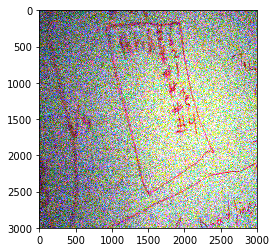

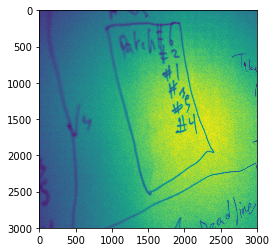

In [157]:
import scipy.ndimage as ndimage

im1 = ndimage.imread("./data/renoir/Noisy.bmp")
im2 = ndimage.imread("./data/renoir/Reference.bmp", -1)

plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

red_images = im1[:,:,0]
green_images = im1[:,:,1]
blue_images = im1[:,:,2]

In [ ]:

img = cv2.imread('home.jpg',0)
plt.hist(red_images,256,[0,256]); 
plt.show()

print(123)

In [ ]:

plt.plot(
    np.ndarray.flatten(green_images)
)
plt.show()

In [ ]:
plt.plot(
    np.ndarray.flatten(blue_images)
)
plt.show()
    
plt.ylabel('pixel ')
plt.xlabel('value ')
plt.show()
plt.plot(
    np.ndarray.flatten(im2)
)
plt.show()



(b) Try to decrease the noise via image down/up sampling.
<br>

(a) Do it for the RGB image. Measure the PSNR between the reference and de-noised
images 3 .
<br>

(b) Do it for the grayscale image. Measure the PSNR between the grayscale reference
and de-noised images.
<br>

(c) Do the denoising for the RGB image and after convert it to the grayscale. Measure
the PSNR. Does the obtained result is different from the (b)? Explain the r
<br>


Exercise 8. You are given a set of 4 images: tp1 101.png - tp1 104.png. For one of these
images perform the segmentation of the text information. See the example in Figure 3. Some
graphical elements can be segmented as well.


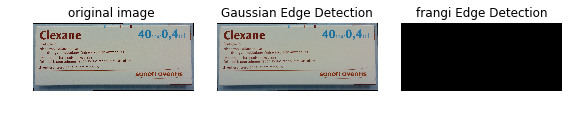

In [156]:
#TODO https://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import gaussian, frangi
image = cv2.imread("./data/tp1_101.png")
image.shape
edge_gaussian = gaussian(image)
edge_frangi = frangi(image, gamma=50)
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(8, 4))
ax[0].imshow(image)
ax[0].set_title('original image ')
ax[1].imshow(edge_gaussian)
ax[1].set_title('Gaussian Edge Detection')
ax[2].imshow(edge_frangi)
ax[2].set_title('frangi Edge Detection')


for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


## Nuts and bolts
In this little project you will design and test a program that can 
recognize various nuts and bolts in an image using Matlab’s morphological 
functions and a bit of statistics. 

The image can be seen in Figure 4. Matlab contains an excellent tutorial 
segmenting and counting rice in an
image, which you can work through as preparation.
The principle steps that need to be done are the following:
• Segment the foreground which contains all parts, from the background. You can use
4
http://www.mathworks.ch/ch/help/images/image-enhancement-and-analysis.html
morphological opening, e.g. imopen to ascertain background statistics or use the so called
Otsi’s method implemented by Matlab graythresh.
• Use morphology to remove any noise from the image
• Select all individual items using Matlab’s bwlabel and bwconncomp.
• To gather statistics deploy Matlab’s regionprops function. It is capable of collecting a
vast amount of information on binary objects which in term can be used to distinguish
the various parts from each other.
• Find a combination of metrics to separate the different parts as best as possible.

### Exercise 9. ex
1. Implement the image segmentation and statistics gathering functions


In [ ]:
# otsu method from skimage 
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

In [ ]:
2. Report on what statistics work and why (not).